# Nama : Adinda Rizka Hamdasati
# NIM : 24060122140139
# Tugas 1 Praktikum ML C1

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

## 1. Memuat dan Menyiapkan Dataset

Langkah pertama adalah memuat dataset Iris yang digunakan dalam tugas praktikum ini. Dataset ini diunduh dari URL yang disediakan oleh UCI Machine Learning Repository. Dataset ini terdiri dari 150 sampel bunga iris dengan 4 fitur, yaitu panjang dan lebar kelopak serta panjang dan lebar sepal, serta 3 kelas target (setosa, versicolor, dan virginica).

Dataset ini kemudian dibagi menjadi dua bagian:
- **Fitur (X)**: Berisi data numerik yang akan digunakan untuk prediksi (panjang dan lebar kelopak serta sepal).
- **Label (Y)**: Menyimpan target atau kelas (setosa, versicolor, dan virginica).
  
Data dibagi menjadi **data pelatihan (training set)** dan **data validasi (validation set)** dengan rasio 80% untuk pelatihan dan 20% untuk validasi.


In [13]:
# Memuat dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Memisahkan fitur dan label
array = dataset.values
X = array[:, 0:4]  # Fitur
Y = array[:, 4]    # Label

# Membagi dataset menjadi data training dan data validasi
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


## 2. Evaluasi Model K-Nearest Neighbors (KNN)

Pada bagian ini, menggunakan **K-Nearest Neighbors (KNN)** untuk melakukan klasifikasi. KNN adalah algoritma yang mengklasifikasikan data berdasarkan kedekatannya dengan data lain dalam ruang fitur. Setiap data baru akan diberi label berdasarkan mayoritas label dari tetangga terdekatnya.

- Pertama, model KNN dibuat menggunakan `KNeighborsClassifier()`.
- Model dievaluasi dengan **K-Fold Cross Validation** menggunakan 10 fold, yang memungkinkan kita untuk mendapatkan estimasi akurasi yang lebih stabil.

Setelah evaluasi, model KNN dilatih menggunakan data pelatihan (`X_train` dan `Y_train`), kemudian melakukan prediksi pada data validasi (`X_validation`).



KNN - Mean Accuracy: 0.9833, Std Dev: 0.0333
Akurasi KNN: 0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



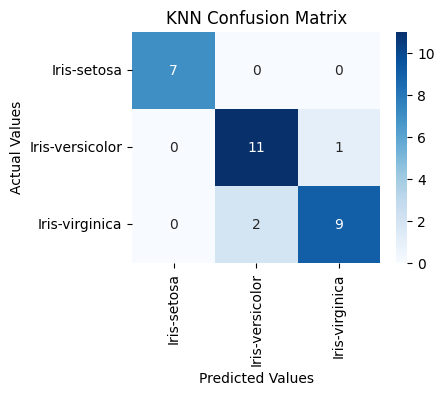

In [14]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()

# Evaluasi KNN dengan K-Fold Cross Validation
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cv_results_knn = cross_val_score(knn, X_train, Y_train, cv=kfold, scoring='accuracy')

# Menampilkan hasil evaluasi KNN
print(f"KNN - Mean Accuracy: {cv_results_knn.mean():.4f}, Std Dev: {cv_results_knn.std():.4f}")

# Pelatihan dan Prediksi Menggunakan KNN
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_validation)

# Evaluasi prediksi KNN
print(f"Akurasi KNN: {accuracy_score(Y_validation, knn_predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_validation, knn_predictions)}")
print(f"Classification Report:\n{classification_report(Y_validation, knn_predictions)}")

# Visualisasi Confusion Matrix KNN
cm_knn = confusion_matrix(Y_validation, knn_predictions)
cm_df_knn = pd.DataFrame(cm_knn, index=np.unique(Y_validation), columns=np.unique(Y_validation))
plt.figure(figsize=(4, 3))
sns.heatmap(cm_df_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('KNN Confusion Matrix')
plt.show()


## 3. Evaluasi Model Naive Bayes (NB)

Model **Naive Bayes** adalah model probabilistik yang mengasumsikan bahwa setiap fitur dalam data bersifat independen satu sama lain. Di sini menggunakan **Gaussian Naive Bayes**, yang mengasumsikan distribusi fitur mengikuti distribusi normal.

- Model ini dievaluasi menggunakan **K-Fold Cross Validation** untuk mendapatkan estimasi akurasi yang lebih akurat.
- Setelah evaluasi, model dilatih dengan data pelatihan dan kemudian digunakan untuk melakukan prediksi pada data validasi.

Naive Bayes sering digunakan dalam kasus di mana fitur-fitur data memiliki hubungan probabilistik yang kuat satu sama lain.


Naive Bayes - Mean Accuracy: 0.9667, Std Dev: 0.0408
Akurasi Naive Bayes: 0.8333333333333334
Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



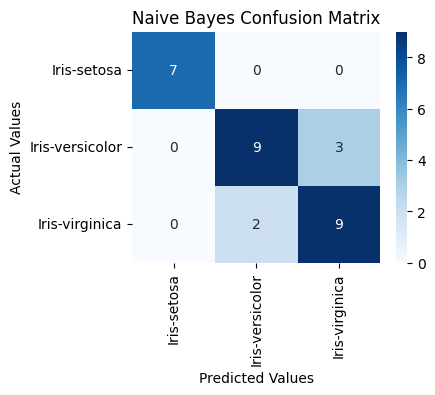

In [15]:
# Naive Bayes (NB)
nb = GaussianNB()

# Evaluasi Naive Bayes dengan K-Fold Cross Validation
cv_results_nb = cross_val_score(nb, X_train, Y_train, cv=kfold, scoring='accuracy')

# Menampilkan hasil evaluasi Naive Bayes
print(f"Naive Bayes - Mean Accuracy: {cv_results_nb.mean():.4f}, Std Dev: {cv_results_nb.std():.4f}")

# Pelatihan dan Prediksi Menggunakan Naive Bayes
nb.fit(X_train, Y_train)
nb_predictions = nb.predict(X_validation)

# Evaluasi prediksi Naive Bayes
print(f"Akurasi Naive Bayes: {accuracy_score(Y_validation, nb_predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_validation, nb_predictions)}")
print(f"Classification Report:\n{classification_report(Y_validation, nb_predictions)}")

# Visualisasi Confusion Matrix Naive Bayes
cm_nb = confusion_matrix(Y_validation, nb_predictions)
cm_df_nb = pd.DataFrame(cm_nb, index=np.unique(Y_validation), columns=np.unique(Y_validation))
plt.figure(figsize=(4, 3))
sns.heatmap(cm_df_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


## 4. Evaluasi Model Support Vector Machines (SVM)

Pada bagian ini, menggunakan **Support Vector Machines (SVM)** untuk melakukan klasifikasi. SVM berusaha menemukan **hyperplane** terbaik yang memisahkan kelas-kelas dalam ruang fitur dengan margin yang maksimal.

- Model SVM dilatih dengan data pelatihan dan dievaluasi menggunakan **K-Fold Cross Validation**.
- Setelah model dilatih, prediksi dilakukan pada data validasi untuk menghitung akurasi, **confusion matrix**, dan **classification report**.

SVM efektif ketika ada pemisahan yang jelas antara kelas-kelas dalam data.

SVM - Mean Accuracy: 0.9833, Std Dev: 0.0333
Akurasi SVM: 0.8666666666666667
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



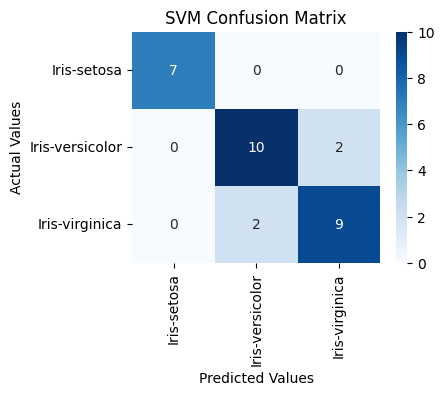

In [16]:
# Support Vector Machines (SVM)
svm = SVC()

# Evaluasi SVM dengan K-Fold Cross Validation
cv_results_svm = cross_val_score(svm, X_train, Y_train, cv=kfold, scoring='accuracy')

# Menampilkan hasil evaluasi SVM
print(f"SVM - Mean Accuracy: {cv_results_svm.mean():.4f}, Std Dev: {cv_results_svm.std():.4f}")

# Pelatihan dan Prediksi Menggunakan SVM
svm.fit(X_train, Y_train)
svm_predictions = svm.predict(X_validation)

# Evaluasi prediksi SVM
print(f"Akurasi SVM: {accuracy_score(Y_validation, svm_predictions)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_validation, svm_predictions)}")
print(f"Classification Report:\n{classification_report(Y_validation, svm_predictions)}")

# Visualisasi Confusion Matrix SVM
cm_svm = confusion_matrix(Y_validation, svm_predictions)
cm_df_svm = pd.DataFrame(cm_svm, index=np.unique(Y_validation), columns=np.unique(Y_validation))
plt.figure(figsize=(4, 3))
sns.heatmap(cm_df_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVM Confusion Matrix')
plt.show()


## 5. Membandingkan Hasil Model

Setelah melakukan evaluasi ketiga model klasifikasi (KNN, Naive Bayes, dan SVM), perbandingan hasil dari setiap modelnya yaitu:

### 1. **K-Nearest Neighbors (KNN)**:
- **Akurasi**: Model KNN menunjukkan akurasi yang stabil dan cukup tinggi.
- **Kelebihan**:
  - Mudah diimplementasikan dan intuitif.
  - Bekerja baik pada dataset kecil dengan data yang terstruktur.
- **Kekurangan**:
  - Kinerja bisa menurun pada dataset yang sangat besar atau data dengan dimensi tinggi.
  - Memerlukan banyak memori karena menyimpan seluruh data pelatihan.

### 2. **Naive Bayes (NB)**:
- **Akurasi**: Naive Bayes mungkin memiliki akurasi yang lebih rendah dibandingkan dengan KNN dan SVM pada dataset ini.
- **Kelebihan**:
  - Cepat dalam pelatihan dan prediksi, sangat efisien pada dataset besar.
  - Baik untuk data dengan fitur independen.
- **Kekurangan**:
  - Asumsi independensi antara fitur jarang terjadi di dunia nyata, sehingga kinerjanya bisa menurun pada data yang memiliki ketergantungan antar fitur.

### 3. **Support Vector Machines (SVM)**:
- **Akurasi**: SVM menunjukkan kinerja yang baik dengan akurasi tinggi.
- **Kelebihan**:
  - Bekerja baik pada data dengan dimensi tinggi dan pemisahan yang jelas antar kelas.
  - Tidak sensitif terhadap **overfitting** jika parameter diatur dengan baik.
- **Kekurangan**:
  - Bisa sangat lambat pada dataset yang sangat besar.
  - Memilih kernel yang tepat untuk data yang tidak linier bisa sulit.

### Kesimpulan:
- **KNN** sangat baik untuk dataset kecil dengan data yang mudah dipisahkan, tetapi mungkin kurang efektif untuk data besar dan dimensi tinggi.
- **Naive Bayes** lebih efisien dan cepat, tetapi asumsi independensi antar fitur mungkin tidak selalu sesuai dengan data.
- **SVM** memiliki kinerja terbaik dalam banyak kasus dengan data yang jelas terpisah, tetapi bisa lebih lambat pada data besar.

Dari ketiga model ini, **SVM** mungkin adalah pilihan terbaik untuk dataset ini, meskipun **KNN** memberikan hasil yang sangat baik juga.

